In [94]:
import pandas as pd
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import datetime
import os
import seaborn as sns
import math as mth
import pickle
import re
import nltk
import spacy
import sklearn

import tika
from tika import parser

import bokeh
from bokeh.plotting import *
from bokeh.io import output_notebook
from bokeh.models import Toggle, BoxAnnotation, CustomJS, HoverTool

output_notebook()

from sklearn.manifold import TSNE

sns.set_style("white")

%matplotlib inline

from IPython.display import display

from IPython.display import HTML

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Loading BokehJS ...

In [95]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zanderl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
# Existing Clients only. Excludes ETF funds + Parent and subsidiary companies + US/Canada only + Ipreo investment approach data + additional data from Form-ADV filings where available
df1 = pd.read_csv('C:/Users/zanderl/Documents/Data Science/SFDC Similar Companies Project/SFDC and Ipreo CoData.csv',encoding='latin1')



# Excludes ETF funds, Parent and subsidiary companies, US/Canada only, include additional data from Form-ADV filings where available
#df1 = pd.read_csv('C:/Users/zanderl/Documents/Data Science/SFDC Similar Companies Project/SFDC Company Data Filtered for US Includes Subsidiaries with Form ADV.csv',encoding='latin1')

# Excludes ETF funds, Parent and subsidiary companies, US/Canada only
#df1 = pd.read_csv('C:/Users/zanderl/Documents/Data Science/SFDC Similar Companies Project/SFDC Company Data Filtered for US Includes Subsidiaries.csv',encoding='latin1')

# Parent company level data only, US/Canada only
#df1 = pd.read_csv('C:/Users/zanderl/Documents/Data Science/SFDC Similar Companies Project/SFDC Company Data Filtered for US and Parent Company.csv',encoding='latin1')

# Subsidiary level company data, US/Canada only
#df1 = pd.read_csv('C:/Users/zanderl/Documents/Data Science/SFDC Similar Companies Project/SFDC Company Data Filtered for US.csv',encoding='latin1')

#df1 = pd.read_csv('C:/Users/zanderl/Documents/Data Science/SFDC Similar Companies Project/SFDC Company Data.csv', encoding='latin1')
#df1 = pd.read_csv('C:/Users/zanderl/Documents/Data Science/SFDC Similar Companies Project/PA Greenfield Ideas Cleaned.csv', encoding='latin1')

In [97]:
#df1.index = df1['Relationship Name']

df1.index = df1['Account Name']
#df1.drop(labels=['Account Name'],axis=1,inplace=True)

df1.shape
df1.head(5)

(989, 59)

,Account Name,Business Description,Business Description Plain,Investment Approach,Billing Country,Billing State/Province,Billing City,Account ID (Case Safe),S&P Capital IQ Company ID,KeyInstn - SNL,...,Dominant Style,Dominant Orientation,Contact Equity Assets ($m),Account Equity Assets Under Management ($m),City,State,Country,Geographic Region,CRM,Primary Contacts
Account Name,,,,,,,,,,,,,,,,,,,,,
12 West Capital Management LP,12 West Capital Management LP,12 West Capital Management LP is an employee o...,12 West Capital Management LP is an employee o...,NaN,United States,NY,New York,0014000000diOsEAAU,IQ158358908,4321055.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1832 Asset Management L.P.,1832 Asset Management L.P.,1832 Asset Management L.P. is a privately owne...,1832 Asset Management L.P. is a privately owne...,NaN,Canada,ON,Toronto,0014000000FGy4YAAT,IQ1029378,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1919 Investment Counsel, LLC","1919 Investment Counsel, LLC","1919 Investment Counsel, LLC operates as a sub...","1919 Investment Counsel, LLC operates as a sub...",NaN,United States,MD,Baltimore,0014000001llGwcAAE,IQ59705013,4096352.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361° Capital LLC,361° Capital LLC,361° Capital LLC is an employee owned hedge fu...,361° Capital LLC is an employee owned hedge fu...,NaN,United States,CO,Denver,0014000000cCrlGAAS,IQ116742844,4117083.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"3G Capital, Inc.","3G Capital, Inc.","3G Capital, Inc. is a private equity firm spec...","3G Capital, Inc. is a private equity firm spec...",NaN,United States,NY,New York,0014000000K85RQAAZ,IQ23471434,4189265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
coData_df = pd.DataFrame(df1,columns=['Business Description'],index=df1.index)

In [99]:
coData_df.head()

,Business Description
Account Name,
12 West Capital Management LP,12 West Capital Management LP is an employee o...
1832 Asset Management L.P.,1832 Asset Management L.P. is a privately owne...
"1919 Investment Counsel, LLC","1919 Investment Counsel, LLC operates as a sub..."
361° Capital LLC,361° Capital LLC is an employee owned hedge fu...
"3G Capital, Inc.","3G Capital, Inc. is a private equity firm spec..."


In [100]:
df1.loc['12 West Capital Management LP']['Business Description']

'12 West Capital Management LP is an employee owned hedge fund sponsor. It primarily provides its services to pooled investment vehicles. The firm launches and manages hedge fund for its clients. It invests in the public equity and fixed income markets across the globe. The firm invests in value stocks of small-cap companies. It employs a long/short equity strategy to make its investments. 12 West Capital Management LP is based in New York City. In managing the Funds, we invest both long and short, in equity, equity related, and credit securities. In addition, we may also invest in preferred stocks, warrants, rights, options, swaps and other derivative instruments, bonds and other fixed income securities, futures and money market instruments. We believe that investing in companies with an equity market capitalization of U.S. $2.5 billion or less (\x93Small Cap\x94) offers the greatest opportunity to generate superior compounded annual net returns, predominantly because: (i) There is a 

In [101]:
df1['Business Description'] = df1['Business Description'].str.lower()
coData_df['Business Description'] = coData_df['Business Description'].str.lower()

In [102]:
#pd.isnull(coData_df).sum()

In [103]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import DBSCAN
import gensim
import nltk

In [162]:
vectorizer = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1,3),
    stop_words='english',
    min_df = 10,
    max_df = 0.60
    # Original value: max_df = 0.8
)

# 3/12/2018: Changed ngram_range=(1,2) to ngram_range(1,3)

In [163]:
%%time
X = vectorizer.fit_transform(coData_df['Business Description'])
X

Wall time: 600 ms


In [164]:
type(X)
X.shape

scipy.sparse.csr.csr_matrix

(989, 2744)

In [165]:
# let's inspect some of the features that were extracted
feat_names = vectorizer.get_feature_names()[:]
len(feat_names)

#vect.get_feature_names()[500:]

2744

In [166]:
#feat_names[(int(len(feat_names)/2)):]

In [167]:
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.neighbors import ball_tree, BallTree

In [168]:
nmf_model = NMF(n_components=128)

In [169]:
%%time
X_NMF_transformed = nmf_model.fit_transform(X)

Wall time: 24.8 s


In [170]:
nmf_model.reconstruction_err_

21.269222847387017

In [171]:
X_NMF_transformed.shape

(989, 128)

In [172]:
# svd = TruncatedSVD(n_components=2900)

# Original preferred value is n_components = 128
# PA greenfield 1811

In [173]:
# %%time
# X_transformed = svd.fit_transform(X)

In [174]:
# svd.explained_variance_ratio_.sum()
# X_transformed.shape

In [175]:
%%time

index = BallTree(X_NMF_transformed)

#index = BallTree(X_transformed)

Wall time: 4 ms


In [176]:
%%time

index.query(X_NMF_transformed[[0]],k=11,dualtree=True)

#index.query(X_transformed[[0]],k=11,dualtree=True)

# This was originally set ot k=10
# dualtree was originally set to False

Wall time: 0 ns


(array([[ 0.        ,  0.0762538 ,  0.09104629,  0.09122639,  0.0915749 ,
          0.09161934,  0.09439754,  0.0946773 ,  0.09487762,  0.09594293,
          0.0964717 ]]),
 array([[  0, 304, 345, 638, 718, 577, 658, 353, 692, 823, 455]], dtype=int64))

In [177]:
test_company = 'Harmony Asset Management LLC'
i = df1.index.get_loc(test_company)

In [178]:
distances, indices = index.query(X_NMF_transformed[[i]],k=11,dualtree=True)

#distances, indices = index.query(X_transformed[[i]],k=11,dualtree=True)

# Tried this to see if it would improve results. Need to look into how to use it more because it threw an error
#distances, indices = index.query_radius(X_transformed[[i]],r=0.3,count_only=False)

In [179]:
df1['Business Description'].iloc[indices[0]]

Account Name
Harmony Asset Management LLC                  harmony asset management llc provides economic...
1919 Investment Counsel, LLC                  1919 investment counsel, llc operates as a sub...
Eagle Asset Management, Inc.                  eagle asset management, inc. is a privately ow...
Paradigm Asset Management Co., LLC            paradigm asset management co. llc is an employ...
Wilmington Trust Investment Advisors, Inc.    mtb investment advisors, inc. is a privately o...
Highline Capital Management, L.P.             highline capital management, l.p. is an employ...
Fort Washington Investment Advisors, Inc.     fort washington investment advisors, inc. is a...
Biondo Investment Advisors LLC                biondo investment advisors llc is an employee ...
Pershing Square Capital Management, L.P.      the adviser is a concentrated, research-intens...
Picton Mahoney Asset Management               picton mahoney asset management is a privately...
Knightsbridge Asset Managem

In [180]:
SimilarCo_df = pd.DataFrame(df1['Business Description'].iloc[indices[0]])
SimilarCo_df.shape

(11, 1)

In [181]:
for i in SimilarCo_df.index:
    print(''.join(i))

Harmony Asset Management LLC
1919 Investment Counsel, LLC
Eagle Asset Management, Inc.
Paradigm Asset Management Co., LLC
Wilmington Trust Investment Advisors, Inc.
Highline Capital Management, L.P.
Fort Washington Investment Advisors, Inc.
Biondo Investment Advisors LLC
Pershing Square Capital Management, L.P.
Picton Mahoney Asset Management
Knightsbridge Asset Management LLC


In [182]:
#SimilarCo_df.iloc[0][0]

In [183]:
#SimilarCo_df.iloc[1][0]

In [184]:
#SimilarCo_df.iloc[2][0]

In [185]:
#SimilarCo_df.iloc[3][0]

In [186]:
#SimilarCo_df.iloc[10][0]

In [187]:
raw_documents = [SimilarCo_df.iloc[0][0],
                 SimilarCo_df.iloc[1][0],
                 SimilarCo_df.iloc[2][0],
                 SimilarCo_df.iloc[3][0],
                 SimilarCo_df.iloc[4][0],
                 SimilarCo_df.iloc[5][0],
                 SimilarCo_df.iloc[6][0],
                 SimilarCo_df.iloc[7][0],
                 SimilarCo_df.iloc[8][0],
                 SimilarCo_df.iloc[9][0],
                 SimilarCo_df.iloc[10][0]]

In [188]:
vect2 = TfidfVectorizer(min_df=1,
                       ngram_range=(1,1),
                       max_df=0.70)

tfidf2 = vect2.fit_transform(raw_documents)
tfidf_format = (tfidf2 * tfidf2.T).A
tfidf_similarity = tfidf_format[0]

In [189]:
tfidf2.shape

(11, 1532)

In [190]:
from nltk.tokenize import word_tokenize
gen_docs = [[w.lower() for w in word_tokenize(text)]
           for text in raw_documents]

In [191]:
dictionary = gensim.corpora.Dictionary(gen_docs)

corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

# NOTE: num_mnz is the number of tokens

tf_idf = gensim.models.TfidfModel(corpus)
print(tf_idf)
s = 0
for i in corpus:
    s += len(i)
s

TfidfModel(num_docs=11, num_nnz=3681)


3681

In [192]:
#for i in range(len(dictionary)):
#    print(i, dictionary[i])

In [193]:
sims = gensim.similarities.Similarity(gensim.utils.os.getcwd(), tf_idf[corpus],
                                     num_features=len(dictionary))

print(sims)
print(type(sims))

Similarity index with 11 documents in 0 shards (stored under C:\Users\zanderl)
<class 'gensim.similarities.docsim.Similarity'>


In [194]:
query_doc = [w.lower() for w in word_tokenize(SimilarCo_df.iloc[0][0])]
query_doc_bow = dictionary.doc2bow(query_doc)
query_doc_tf_idf = tf_idf[query_doc_bow]

In [195]:
SimilarCo_df['tfidf Similarity'] = tfidf_similarity
SimilarCo_df['NLTK tfidf Similarity'] = sims[query_doc_tf_idf]
SimilarCo_df['Euclidian Distances'] = distances.T

In [196]:
SimilarCo_df.sort_values(by='tfidf Similarity',ascending=False,inplace=True)
SimilarCo_df

,Business Description,tfidf Similarity,NLTK tfidf Similarity,Euclidian Distances
Account Name,,,,
Harmony Asset Management LLC,harmony asset management llc provides economic...,1.000000,0.999999,0.000000
"Pershing Square Capital Management, L.P.","the adviser is a concentrated, research-intens...",0.195256,0.082395,0.116694
Picton Mahoney Asset Management,picton mahoney asset management is a privately...,0.150548,0.066291,0.117625
"1919 Investment Counsel, LLC","1919 investment counsel, llc operates as a sub...",0.135380,0.063260,0.081836
"Wilmington Trust Investment Advisors, Inc.","mtb investment advisors, inc. is a privately o...",0.109320,0.043746,0.103226
"Paradigm Asset Management Co., LLC",paradigm asset management co. llc is an employ...,0.101291,0.039160,0.096793
"Highline Capital Management, L.P.","highline capital management, l.p. is an employ...",0.085124,0.028023,0.111945
"Eagle Asset Management, Inc.","eagle asset management, inc. is a privately ow...",0.079741,0.029935,0.090120
Biondo Investment Advisors LLC,biondo investment advisors llc is an employee ...,0.064561,0.027524,0.116233


In [139]:
SimilarCo_df.sort_values(by='tfidf Similarity',ascending=False,inplace=True)
SimilarCo_df

,Business Description,tfidf Similarity,NLTK tfidf Similarity,Euclidian Distances
Account Name,,,,
Harmony Asset Management LLC,harmony asset management llc provides economic...,1.000000,1.000001,0.000000
Pivot Point Capital,"""pivot point capital is a private equity firm....",0.391465,0.331737,0.174548
"Pershing Square Capital Management, L.P.","the adviser is a concentrated, research-intens...",0.180598,0.106816,0.157276
Picton Mahoney Asset Management,picton mahoney asset management is a privately...,0.152386,0.089701,0.171677
Wellington Management Group LLP,wellington management group llp is a privately...,0.120346,0.057754,0.197576
"Glenview Capital Management, LLC","glenview capital management, llc is a privatel...",0.116981,0.051092,0.208689
"Paradigm Asset Management Co., LLC",paradigm asset management co. llc is an employ...,0.112615,0.053609,0.186470
BNY Mellon Asset Management North America Corporation,bny mellon asset management north america corp...,0.100705,0.045140,0.202452
"Cohen & Steers Capital Management, Inc.",cohen & steers capital management inc. is a pr...,0.092167,0.048546,0.135656


In [140]:
SimilarCo_df.sort_values(by='tfidf Similarity',ascending=False,inplace=True)
SimilarCo_df

,Business Description,tfidf Similarity,NLTK tfidf Similarity,Euclidian Distances
Account Name,,,,
Harmony Asset Management LLC,harmony asset management llc provides economic...,1.000000,1.000001,0.000000
Pivot Point Capital,"""pivot point capital is a private equity firm....",0.391465,0.331737,0.174548
"Pershing Square Capital Management, L.P.","the adviser is a concentrated, research-intens...",0.180598,0.106816,0.157276
Picton Mahoney Asset Management,picton mahoney asset management is a privately...,0.152386,0.089701,0.171677
Wellington Management Group LLP,wellington management group llp is a privately...,0.120346,0.057754,0.197576
"Glenview Capital Management, LLC","glenview capital management, llc is a privatel...",0.116981,0.051092,0.208689
"Paradigm Asset Management Co., LLC",paradigm asset management co. llc is an employ...,0.112615,0.053609,0.186470
BNY Mellon Asset Management North America Corporation,bny mellon asset management north america corp...,0.100705,0.045140,0.202452
"Cohen & Steers Capital Management, Inc.",cohen & steers capital management inc. is a pr...,0.092167,0.048546,0.135656


In [141]:
SimilarCo_df.sort_values(by='tfidf Similarity',ascending=False,inplace=True)
SimilarCo_df

,Business Description,tfidf Similarity,NLTK tfidf Similarity,Euclidian Distances
Account Name,,,,
Harmony Asset Management LLC,harmony asset management llc provides economic...,1.000000,1.000001,0.000000
Pivot Point Capital,"""pivot point capital is a private equity firm....",0.391465,0.331737,0.174548
"Pershing Square Capital Management, L.P.","the adviser is a concentrated, research-intens...",0.180598,0.106816,0.157276
Picton Mahoney Asset Management,picton mahoney asset management is a privately...,0.152386,0.089701,0.171677
Wellington Management Group LLP,wellington management group llp is a privately...,0.120346,0.057754,0.197576
"Glenview Capital Management, LLC","glenview capital management, llc is a privatel...",0.116981,0.051092,0.208689
"Paradigm Asset Management Co., LLC",paradigm asset management co. llc is an employ...,0.112615,0.053609,0.186470
BNY Mellon Asset Management North America Corporation,bny mellon asset management north america corp...,0.100705,0.045140,0.202452
"Cohen & Steers Capital Management, Inc.",cohen & steers capital management inc. is a pr...,0.092167,0.048546,0.135656


In [142]:
SimilarCo_df.sort_values(by='tfidf Similarity',ascending=False,inplace=True)
SimilarCo_df

,Business Description,tfidf Similarity,NLTK tfidf Similarity,Euclidian Distances
Account Name,,,,
Harmony Asset Management LLC,harmony asset management llc provides economic...,1.000000,1.000001,0.000000
Pivot Point Capital,"""pivot point capital is a private equity firm....",0.391465,0.331737,0.174548
"Pershing Square Capital Management, L.P.","the adviser is a concentrated, research-intens...",0.180598,0.106816,0.157276
Picton Mahoney Asset Management,picton mahoney asset management is a privately...,0.152386,0.089701,0.171677
Wellington Management Group LLP,wellington management group llp is a privately...,0.120346,0.057754,0.197576
"Glenview Capital Management, LLC","glenview capital management, llc is a privatel...",0.116981,0.051092,0.208689
"Paradigm Asset Management Co., LLC",paradigm asset management co. llc is an employ...,0.112615,0.053609,0.186470
BNY Mellon Asset Management North America Corporation,bny mellon asset management north america corp...,0.100705,0.045140,0.202452
"Cohen & Steers Capital Management, Inc.",cohen & steers capital management inc. is a pr...,0.092167,0.048546,0.135656


In [143]:
SimilarCo_df['Business Description'].iloc[1]

'"pivot point capital is a private equity firm. the firm invests in the public equity markets of the united states. it also participates in private equity transactions. for equity investments the firm primarily invests in value stocks of small-cap companies. for its private equity investments, it seeks to take all or part of the company private through a leveraged buyout or other structured transaction. the firm also considers structured investments in companies in which it has established an open market position and the company wishes to remain publicly held. it typically partners with a buyout firm in these transactions. pivot point capital was founded in 2005 and is based in san francisco, california. pivot point capital is a registered investment advisor founded in 2005 and headquartered in san francisco. we invest in u.s.-listed small cap equities with the goal of creating long-term value through a highly disciplined investment process supported by the kind of intensive, analytica

In [144]:
%%time
clf = DBSCAN(min_samples=2)

#labels = clf.fit_predict(X_NMF_transformed)
#labels = clf.fit_predict(X_transformed)
labels = clf.fit_predict(X)

Wall time: 138 ms


In [145]:
labels.shape

(989,)

In [146]:
#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_ = len(set(labels))
print ("\nTotal clusters discovered: %d" % n_clusters_)

clustered = labels


Total clusters discovered: 3


In [147]:
labels.shape

(989,)

In [148]:
clustered_series = pd.Series(index=coData_df.index, data=clustered.flatten())
#clustered_series =clustered_series[clustered_series != -1]
clustered_series_all = pd.Series(index=df1, data=clustered.flatten())
#clustered_series_all = pd.Series(index=X_transformed, data=clustered.flatten())

<Container object of 3 artists>

Text(0.5,1,'Cluster Member Counts')

Text(0.5,0,'Stocks in Cluster')

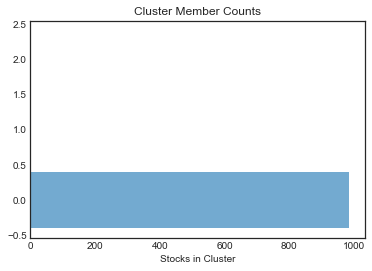

In [149]:
plt.barh(
    #xrange(len(clustered_series.value_counts())),
    range(len(clustered_series.value_counts())),
    clustered_series.value_counts(),
    alpha=0.625
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')

In [150]:
pair_clusters = clustered_series.value_counts()[clustered_series.value_counts()<3].index.values

In [151]:
print(pair_clusters)
print("\nTotal pair clusters discovered: %d" % len(pair_clusters))

[1 0]

Total pair clusters discovered: 2


In [152]:
pair_clusters[:100]

array([1, 0], dtype=int64)

In [153]:
#cluster2 = clustered_series['Westfield Capital Management Company, L.P.']
#coData_df.iloc[clustered==cluster2]

In [154]:
clustered_series.shape

(989,)

In [155]:
clustered_series.sort_values(axis=0,ascending=False).head(20)

Account Name
HG Vora Capital                           1
Woodson Capital Management, LLC           1
Lionstone Capital Management LLC          0
Brightline Capital Management, LLC        0
Harmony Asset Management LLC             -1
Fiduciary Trust Company                  -1
FIAM LLC                                 -1
Fidelity Investments Canada ULC          -1
Fidelity Management & Research Company   -1
Fiduciary Management, Inc.               -1
Fiera Capital Corporation                -1
Fiduciary Trust Company International    -1
Federated Investors, Inc.                -1
Fine Capital Partners, L.P.              -1
Fir Tree Partners                        -1
Firefly Value Partners, LP               -1
Federated MDTA LLC                       -1
Farallon Capital Management, L.L.C.      -1
Fayez Sarofim & Co.                      -1
First Foundation Advisors                -1
dtype: int64

In [156]:
#large_clusters = clustered_series.value_counts()[clustered_series.value_counts()>3].index.values
#print(large_clusters)
#print("\nTotal large clusters discovered: %d" % len(pair_clusters))

In [157]:
%%time

X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X_NMF_transformed)
#X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X_transformed)
#X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

Wall time: 25.3 s


In [158]:
X_tsne.shape

(989, 2)

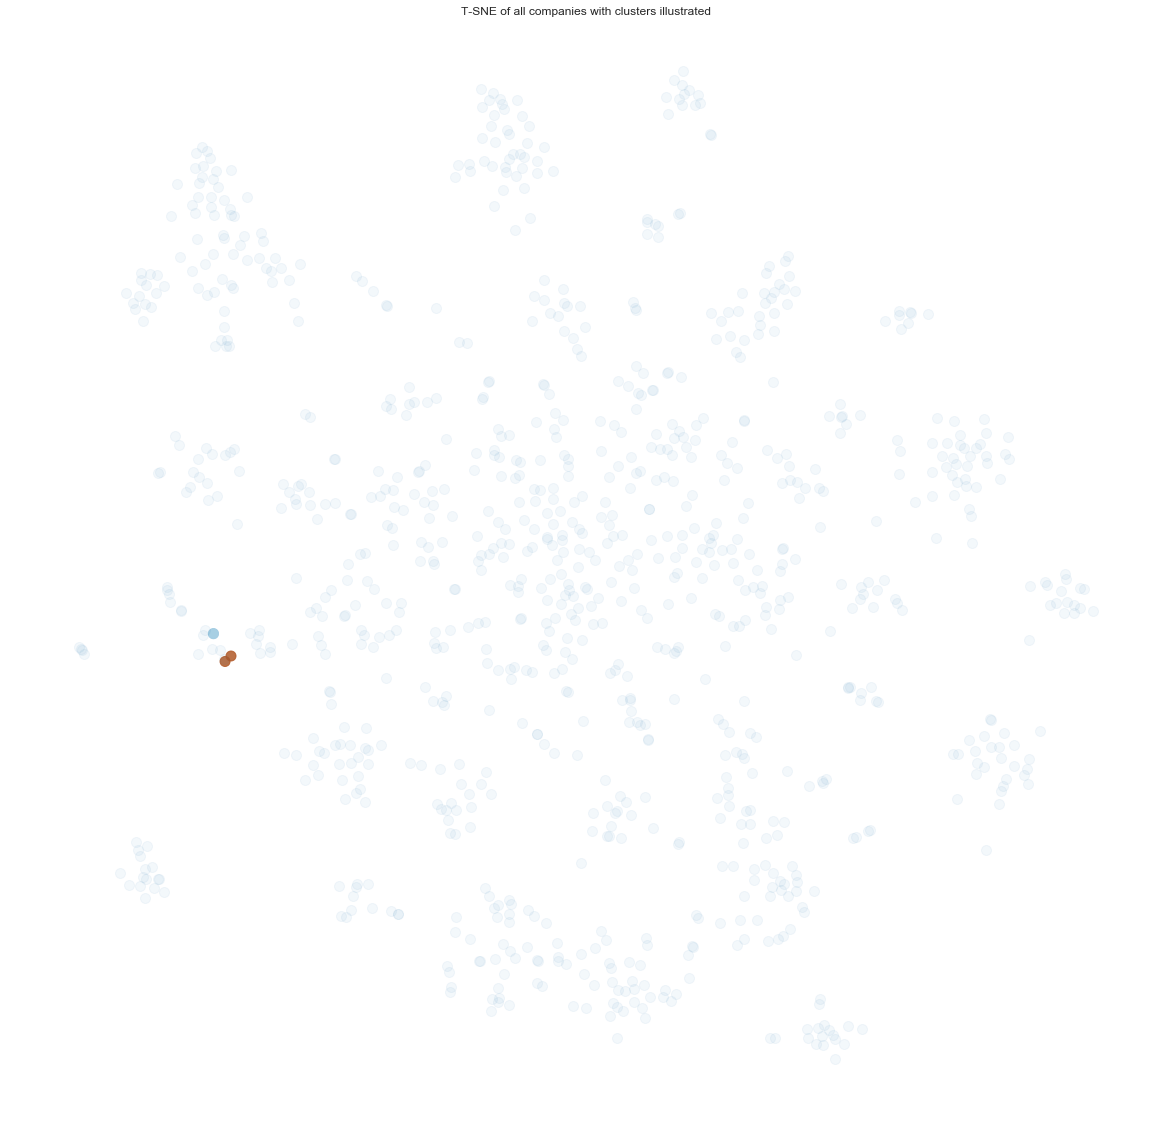

In [159]:
plt.figure(1, facecolor='white',figsize=(20,20))
plt.clf();
plt.axis('off');



plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1],
    cmap=cm.Paired
);

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
);

plt.title('T-SNE of all companies with clusters illustrated');